In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('paper')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
from matplotlib.ticker import FormatStrFormatter

green = '#228833'
purple = '#AA3377'
cyan = '#33BBEE'
red = '#CC3311'
yellow = '#CCBB44'
orange = '#EE7733'
blue = '#0077BB'
magenta = '#EE3377'
# Not from the color palette
grey = '#444444'
denSize = 18
folder = 'Ramp_Paper/'

alpha_m= -0.1


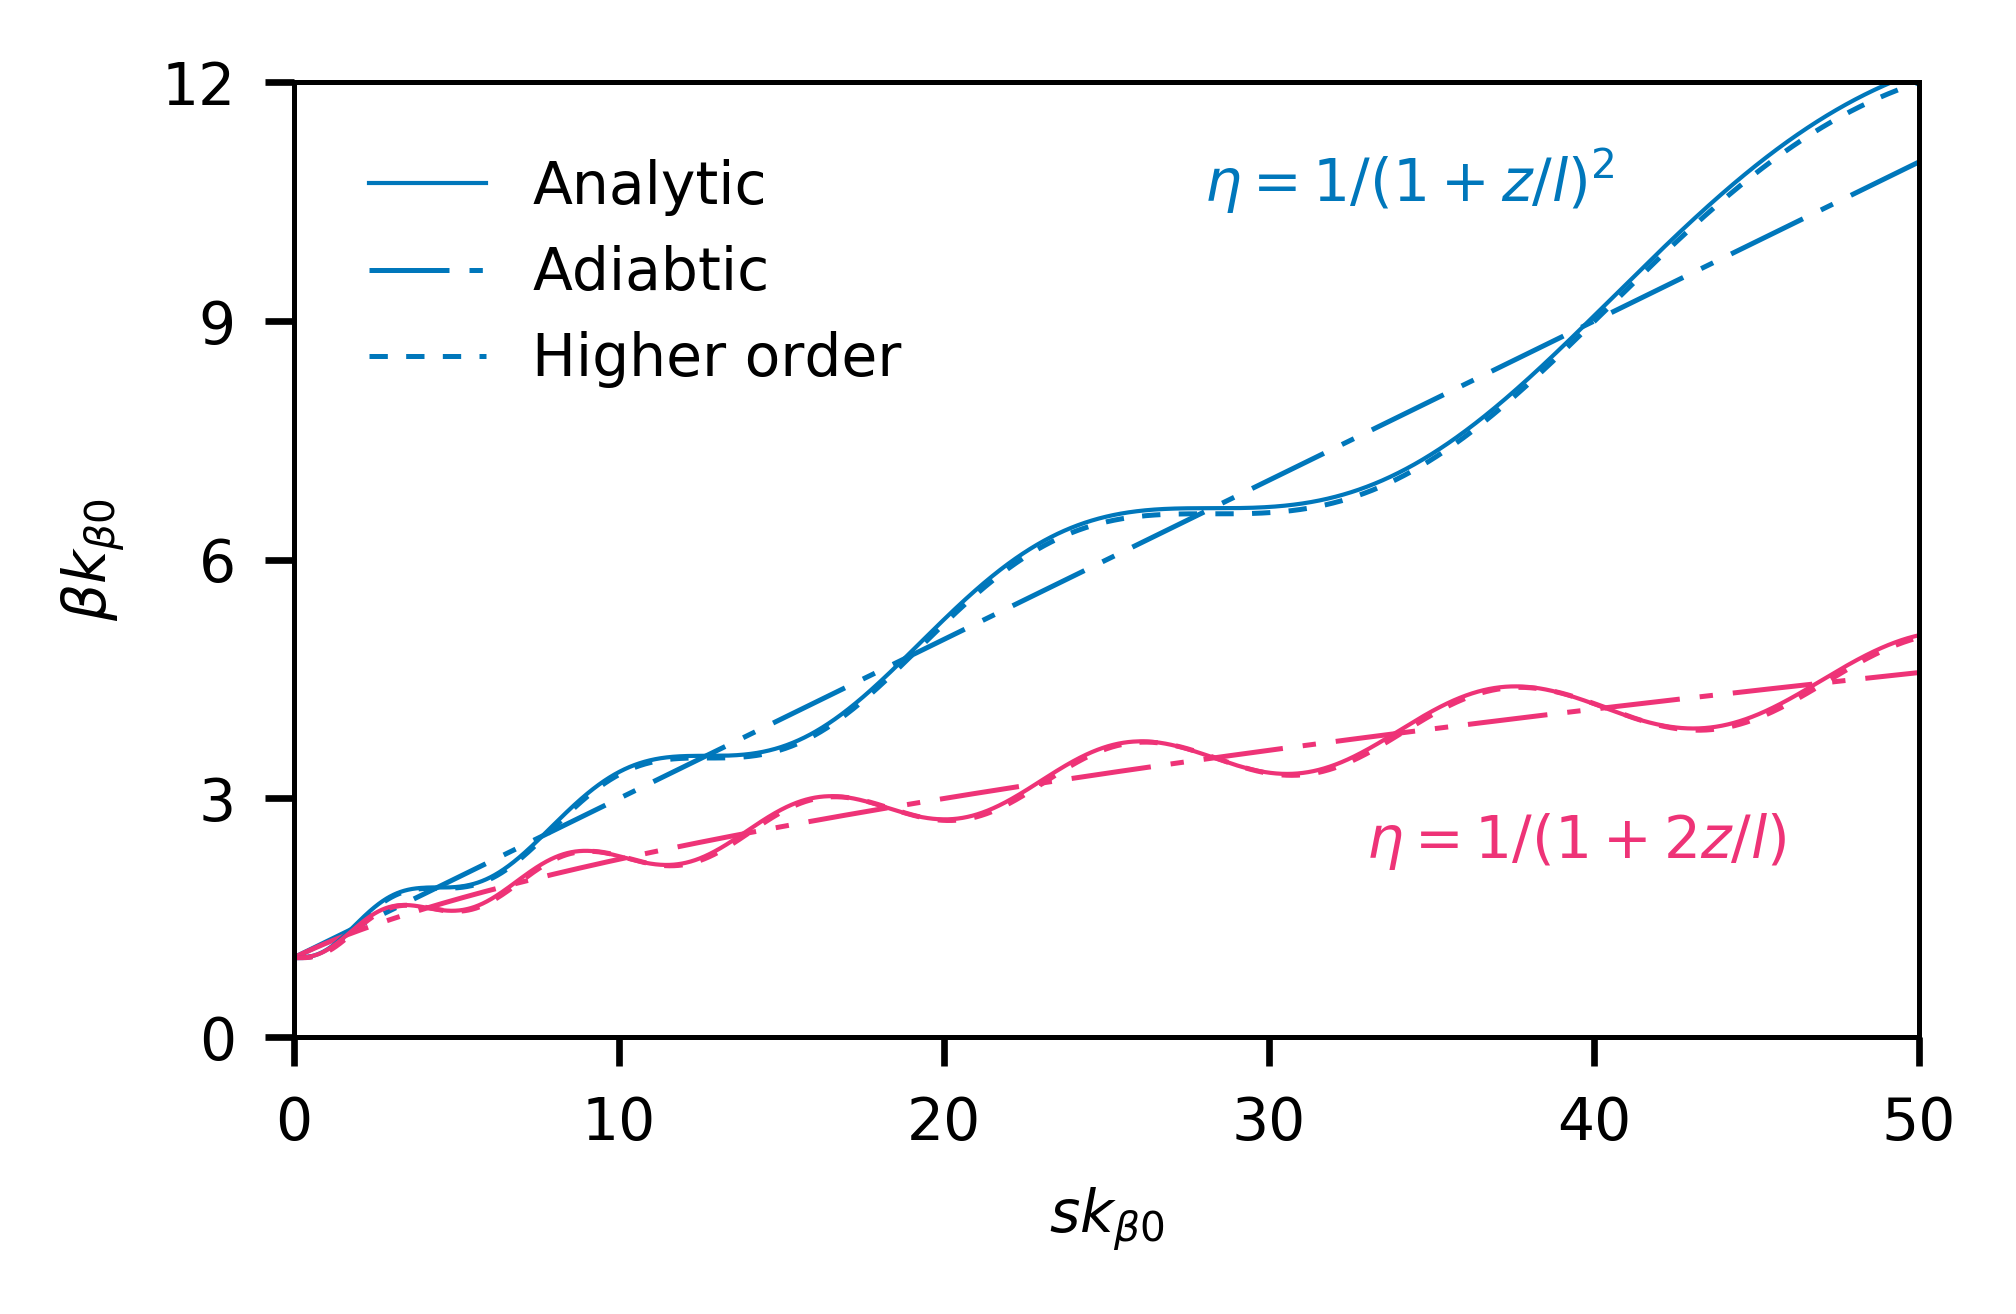

In [2]:
# Higher order adiabatic solution
N = 10000
beta0 = 1
alpha0 = 0
gamma0 = (1+alpha0**2)/beta0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
alpham = -a/2
print("alpha_m=", -a/2)
z, dz = np.linspace(0, 100, N, retstep=True)

# -------------First ramp shape--------------
betam = 1+a*z
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Exact solution
c1 = 0.5*(beta0 - (gamma0-2*alpha0*alpham+alpham**2*beta0)/(1-alpham**2))
c2 = (alpha0-alpham*beta0)/np.sqrt(1-alpham**2)
c0 = np.sqrt(c1**2+c2**2+1/(1-alpham**2))
Phi = np.sqrt(1-alpham**2)*np.log(betam)/(2*alpham)
beta_exact = betam*(c0+c1*np.cos(2*Phi)+c2*np.sin(2*Phi))

# Lowest order adiabatic solution
c0 = 0.5*(beta0+gamma0)
c1 = 0.5*(beta0-gamma0)
c2 = -alpha0
theta = np.cumsum(1/betam)*dz
beta_adi = betam*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

# Higher order adibatic solution
c0 = 0.5*(beta0+gamma0-2*alpha0*alpham)
c1 = 0.5*(beta0-gamma0+2*alpha0*alpham)
c2 = -alpha0+alpham*beta0
theta = np.cumsum(1/betam)*dz
beta_adi2 = betam*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

fig = plt.figure(figsize=(3.37, 2.2), dpi=600)
ax = plt.subplot(111)
#plt.plot(z, beta)
plt.plot(z, beta_exact, c=blue, linewidth=.5)
plt.plot(z, beta_adi, '-.', c=blue, zorder=1)
plt.plot(z, beta_adi2, ':')
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')
plt.text(28, 10.5, r'$\eta=1/(1+z/l)^2$', color=blue)

# -------------Second ramp shape--------------
betam = np.sqrt(1+2*a*z)
frac = 1/(1+2*a*z)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Lowest order adiabatic solution
c0 = 0.5*(beta0+gamma0)
c1 = 0.5*(beta0-gamma0)
c2 = -alpha0
theta = np.cumsum(1/betam)*dz
beta_adi = betam*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

# Higher order adibatic solution
c0 = 0.5*(beta0+gamma0-2*alpha0*alpham)
c1 = 0.5*(beta0-gamma0+2*alpha0*alpham)
c2 = -alpha0+alpham*beta0
theta = np.cumsum(1/betam)*dz
beta_adi2 = betam*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

plt.plot(z, beta, c=magenta, linewidth=.5)
plt.plot(z, beta_adi, '-.', c=magenta, zorder=1)
plt.plot(z, beta_adi2, ':', c=magenta)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')
plt.text(33, 2.25, r'$\eta=1/(1+2z/l)$', color=magenta)

plt.legend([r'Analytic', r'Adiabtic', r'Higher order'], bbox_to_anchor=(.21, .8), loc='center', frameon=False)
ax.yaxis.set_ticks(np.linspace(0, 12, 5))
plt.ylim(0, 12)
plt.xlim(0, 50)
plt.tight_layout()
plt.savefig(folder+'Adiabatic_Theory.eps')
plt.show()

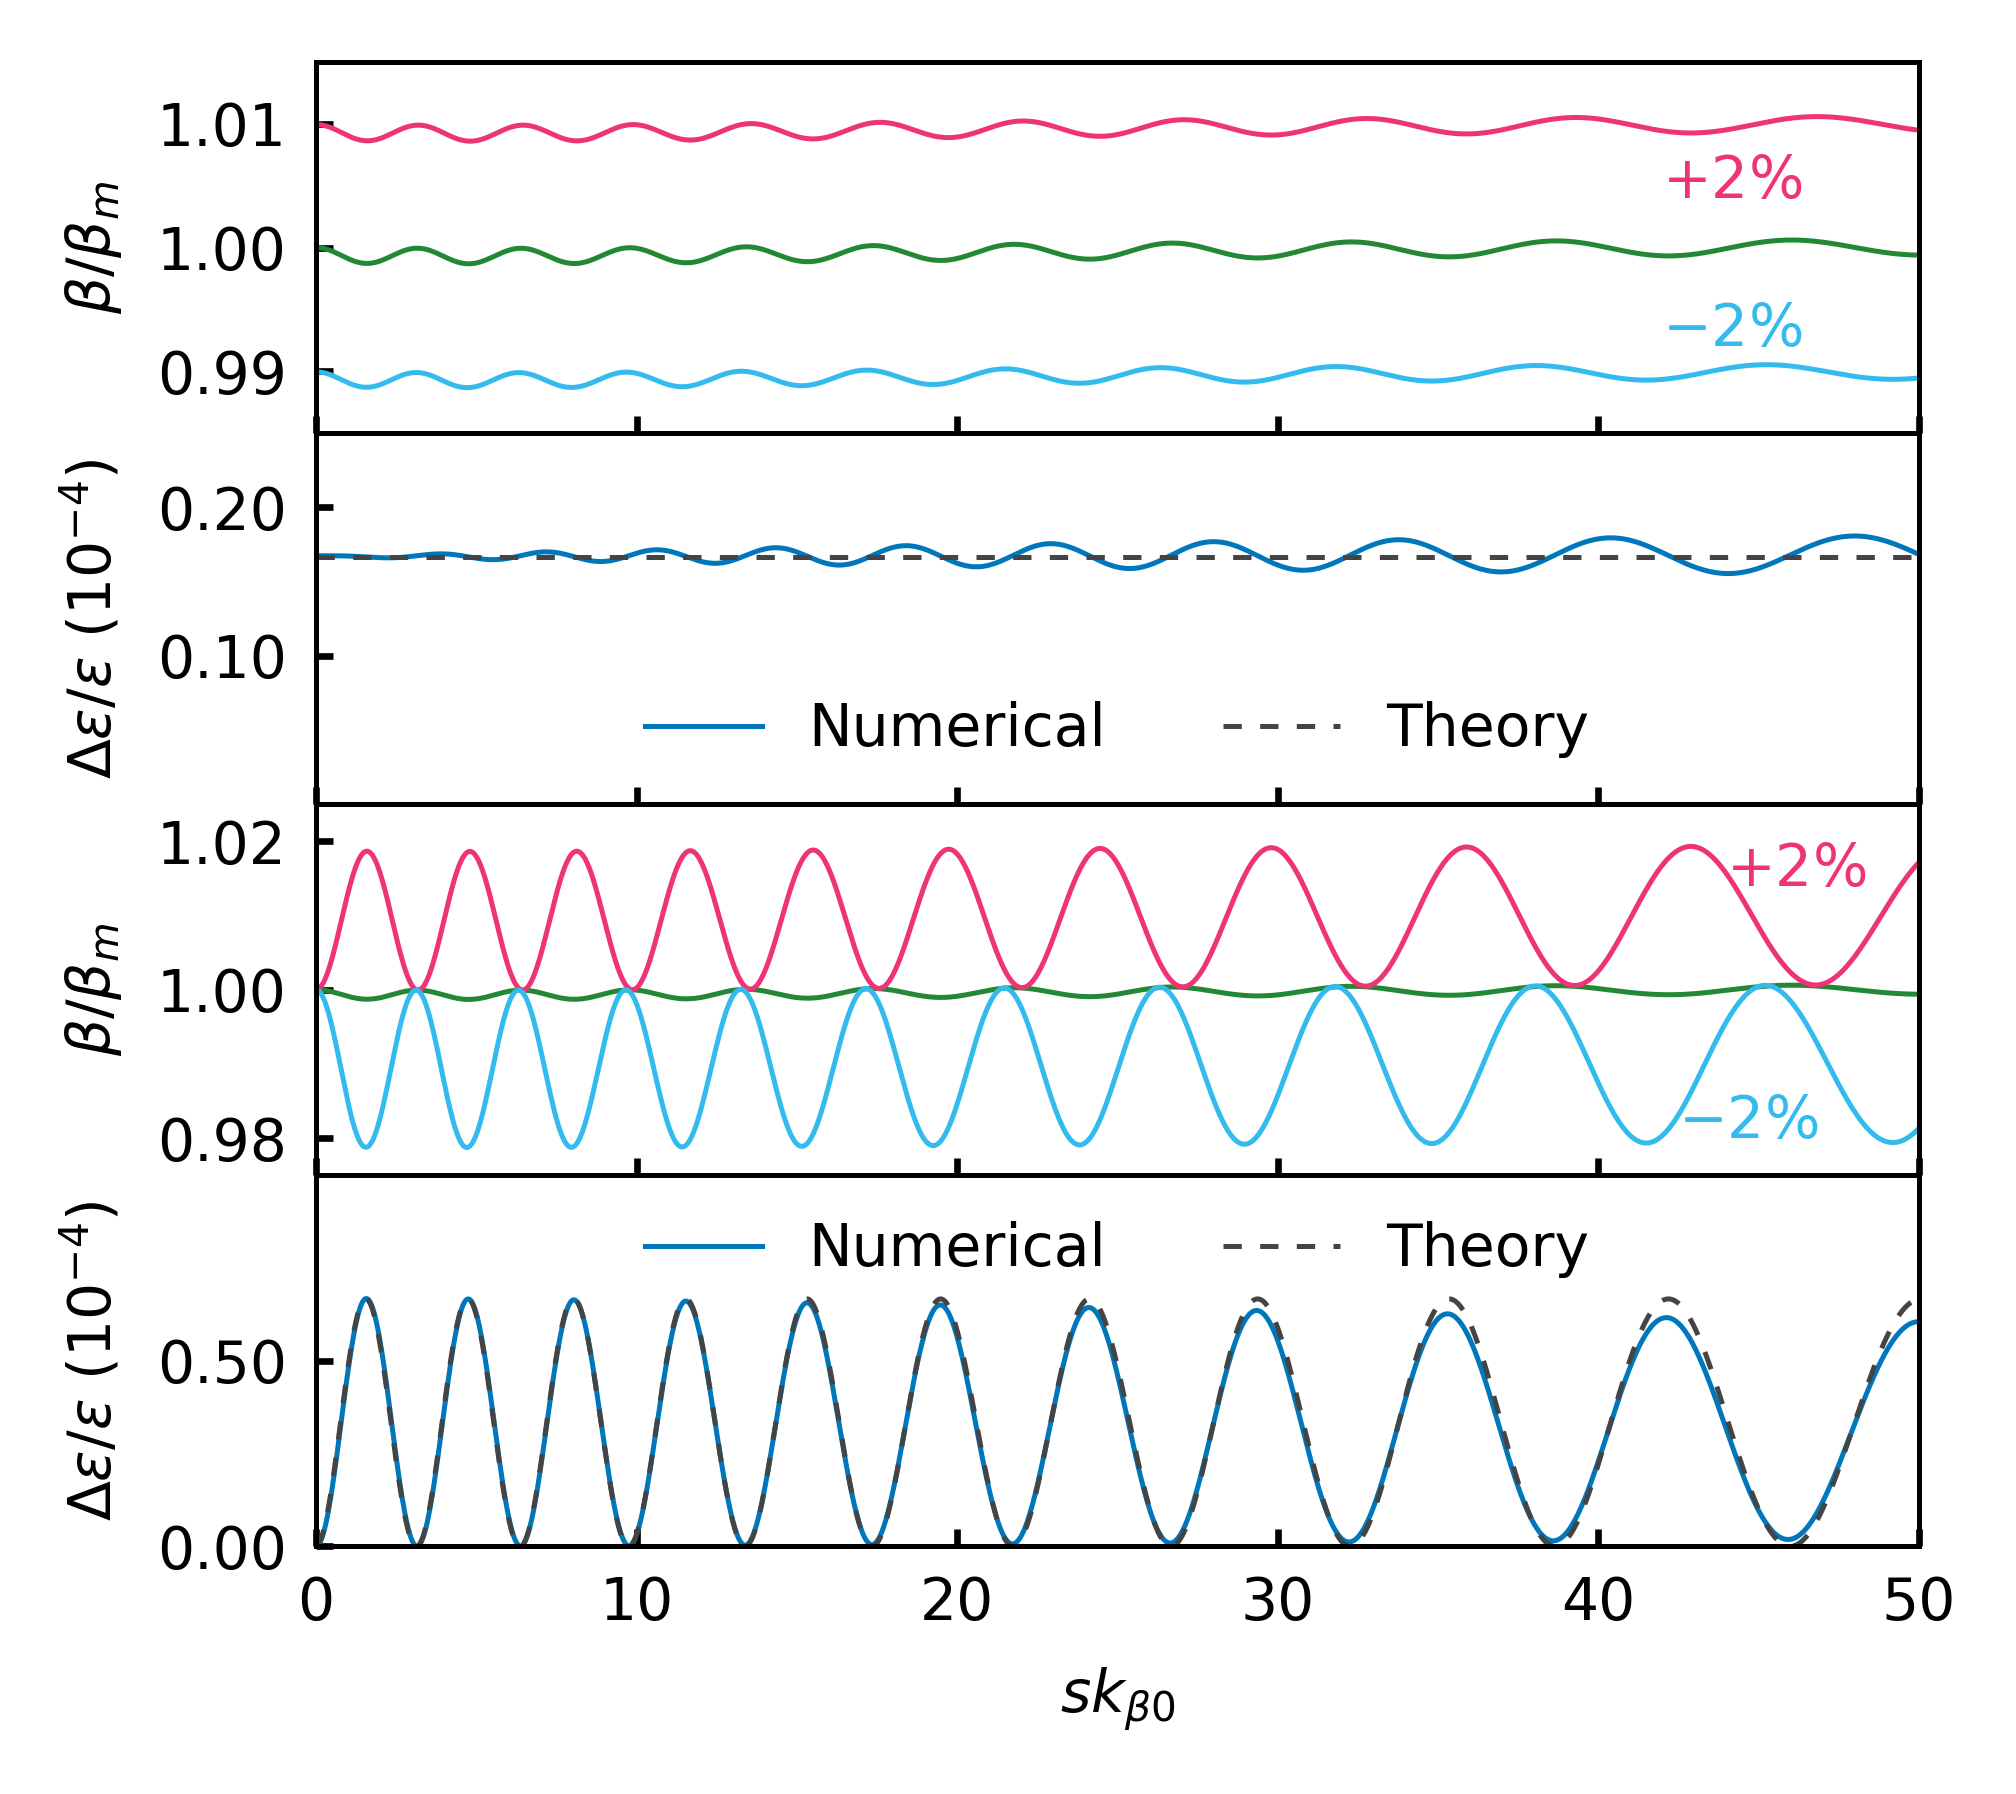

In [3]:
# Comparisons of beam evolution and emittance growth
# The complicated emittance growth and chromatic beam evolution plot
# Try setting a=0.2 and beta0=0.99 - oscillations of centroid energy go away
# Matches the prediction for the small correction to beta_m0 for being perfectly 
N = 5000
beta0 = 1.0
#beta0 = 1.0-.01
alpha0 = 0
gb0 = 20000
delta = 0.02
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.05
#a = .2
alpham = -a/2
z, dz = np.linspace(0, 100, N, retstep=True)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
#Plot 1 beams all start matched
#-----------------------------------------------------------------------------------------
betam = 1/np.sqrt(frac)
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0*np.sqrt(1+delta), alpha0, gb0*(1+delta), dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0*np.sqrt(1-delta), alpha0, gb0*(1-delta), dgdz0, ne0)

M = 500
deltaA = np.linspace(-delta, delta, M)
gb0A = 20000*(1+deltaA)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0*np.sqrt(1+deltaA[i]),
                                                                                  alpha0, gb0A[i], dgdz0, ne0)
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)
eps = np.sqrt(betaP*gammaP-alphaP**2)
    
# Plotting
fig = plt.figure(figsize=(3.37, 3), dpi=600)
gs = gridspec.GridSpec(4, 1)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(z, beta/betam, color=green)
ax1.plot(z, beta1/betam, color=magenta)
ax1.plot(z, betan1/betam, color=cyan)
ax1.tick_params(top=False,bottom=True,left=True,direction='in',length=2)
plt.ylabel(r'$\beta/\beta_m$')
ax1.yaxis.set_ticks([0.99, 1.0, 1.01])
plt.ylim(0.985, 1.015)
plt.text(42, 1.004, r'$+2\%$', color=magenta)
plt.text(42, 0.992, r'$-2\%$', color=cyan)
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax2.plot(z, (eps-1)*1e4)
ax2.plot([0, 100], [delta**2/24*1e4, delta**2/24*1e4], ':', c=grey)
#ax2.plot([0, 100], [delta**2/24-alpham**4/8, delta**2/24-alpham**4/8], '--', c=grey)
plt.ylim(0, .25)
plt.ylabel(r'$\Delta\epsilon/\epsilon$ ($10^{-4}$)')
ax2.tick_params(top=False,bottom=True,left=True,direction='in',length=2)
ax2.yaxis.set_ticks([0.1, 0.2])
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.legend(['Numerical', 'Theory'], bbox_to_anchor=(.5, .2), loc='center', frameon=False, ncol=2)

# Plot 2 beams all start with the same initial conditions
#-----------------------------------------------------------------------------------------
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1+delta), dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1-delta), dgdz0, ne0)

for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0,
                                                                                  alpha0, gb0A[i], dgdz0, ne0)
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)
eps = np.sqrt(betaP*gammaP-alphaP**2)
theta = np.cumsum(1/betam)*dz

# Plotting
ax3 = plt.subplot(gs[2, 0], sharex=ax1)
ax3.plot(z, beta/betam, color=green)
ax3.plot(z, beta1/betam, color=magenta)
ax3.plot(z, betan1/betam, color=cyan)
plt.ylabel(r'$\beta/\beta_m$')
ax3.tick_params(top=False,bottom=True,left=True,direction='in',length=2)
ax3.yaxis.set_ticks([0.98, 1.0, 1.02])
plt.ylim(0.975, 1.025)
plt.text(44, 1.014, r'$+2\%$', color=magenta)
plt.text(42.5, 0.98, r'$-2\%$', color=cyan)

ax4 = plt.subplot(gs[3, 0], sharex=ax1)
ax4.plot(z, (eps-1)*1e4)
ax4.plot(z, (1-np.cos(2*theta))*delta**2/12*1e4, ':', c=grey)
#plt.ylim(0, 1.5e-4)
plt.ylabel(r'$\Delta\epsilon/\epsilon$ ($10^{-4}$)')
ax4.tick_params(top=False,bottom=True,left=True,direction='in',length=2)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax4.yaxis.set_ticks([0.00, 0.5])
plt.legend(['Numerical', 'Theory'], bbox_to_anchor=(.5, .8), loc='center', frameon=False, ncol=2)
plt.ylim(0, 1)
plt.xlim(0, 50)
plt.xlabel(r'$s k_{\beta0}$')

plt.tight_layout()
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.savefig(folder+'Adiabatic_Emittance.eps')
plt.show()

alpha_m= -0.5
28.9303930393
alpha_m= -0.1
152.230223022


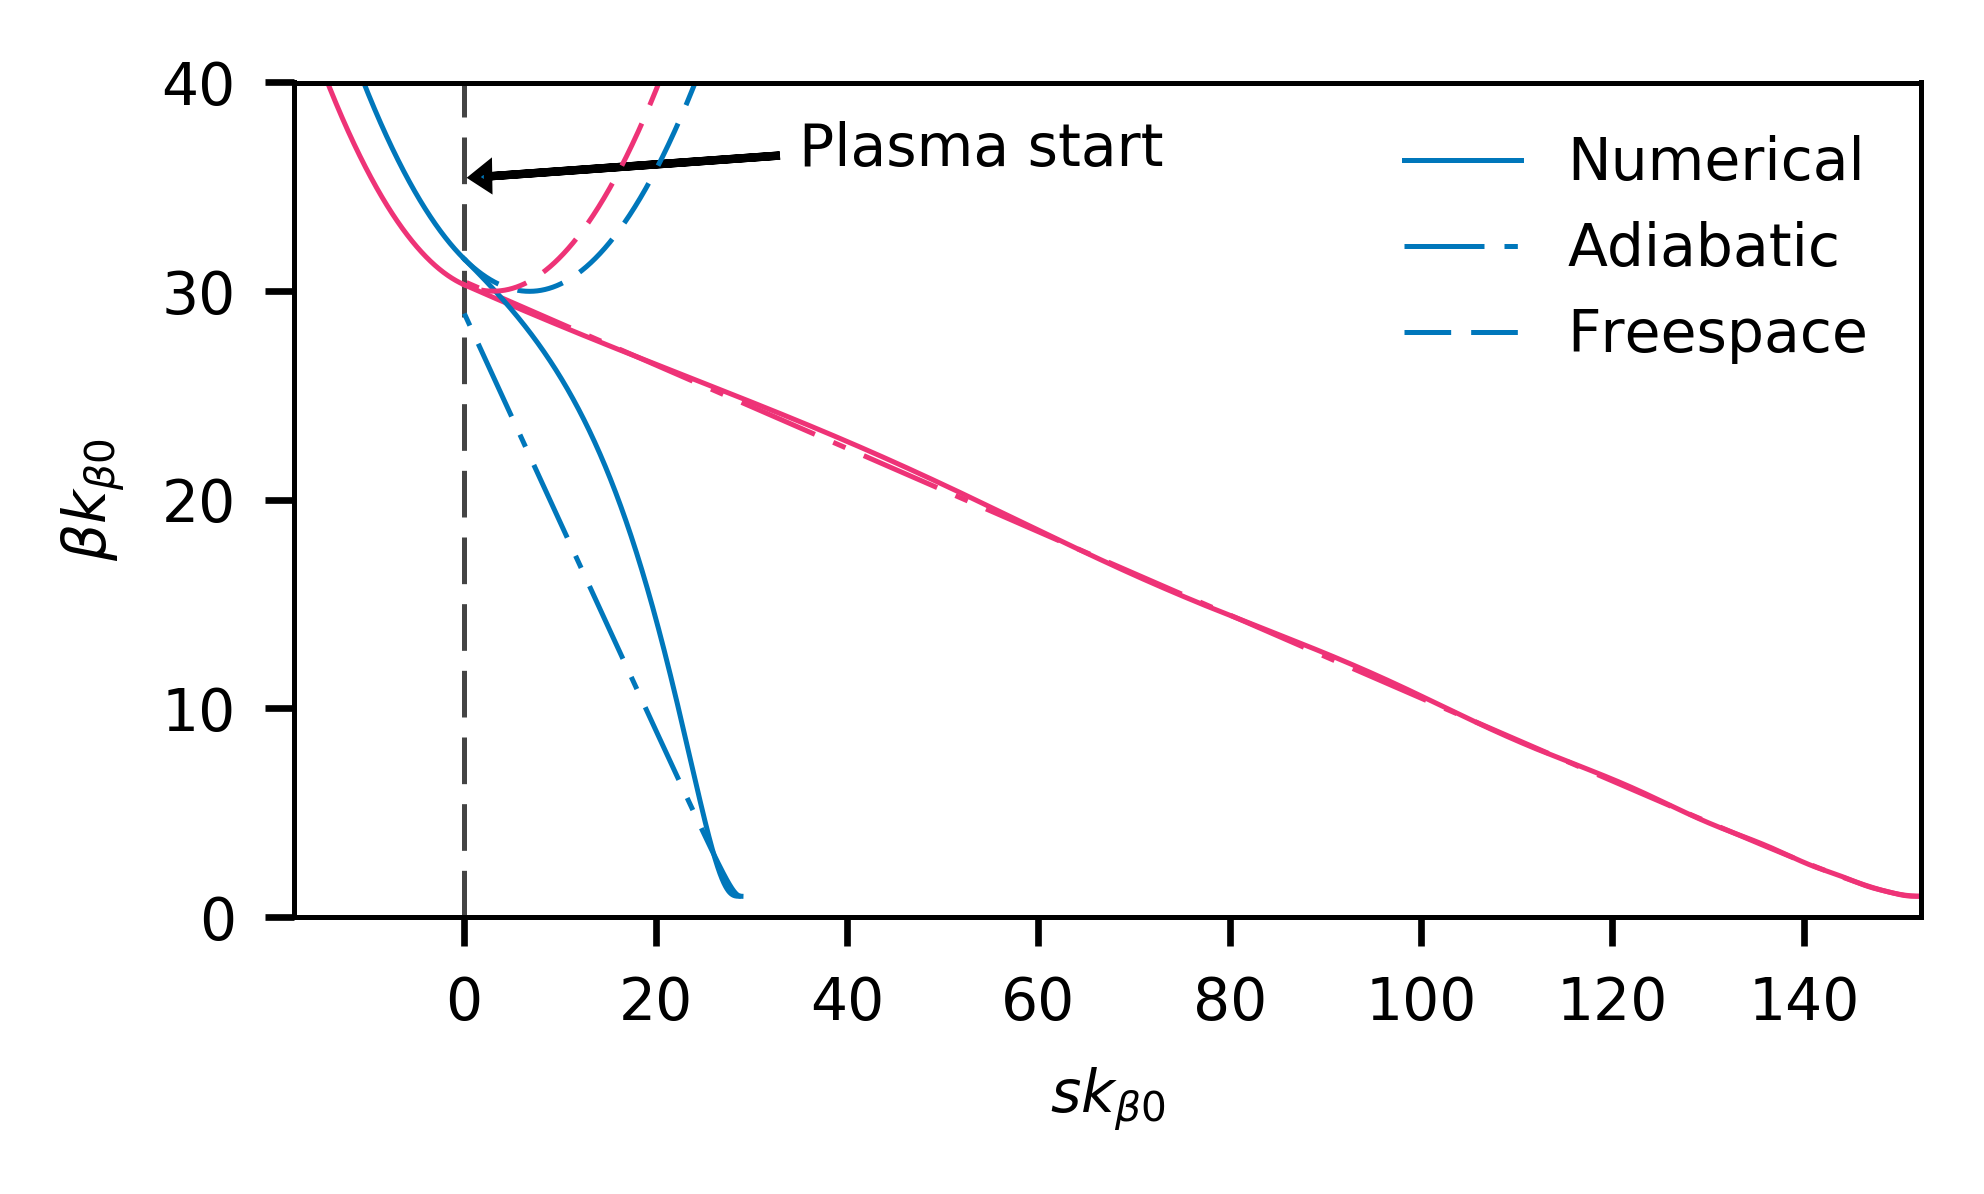

In [4]:
# Non adiabatic ramp figure - difficult to actually make non-adiabatic ramps
N = 10000
Zmax = 175
beta0 = 1
alpha0 = 0
gamma0 = (1+alpha0**2)/beta0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 1.0
alpham = -a/2
print("alpha_m=", -a/2)
z, dz = np.linspace(0, Zmax, N, retstep=True)
frac = 1/(1+(a*z)**2)
betam = 1/np.sqrt(frac)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Lowest order adiabatic solution
c0 = 0.5*(beta0+gamma0)
c1 = 0.5*(beta0-gamma0)
c2 = -alpha0
theta = np.cumsum(1/betam)*dz
beta_adi = betam*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

# Waist size along the ramp
betas = 1/np.array(gamma)
sel = betas < 30
sel2 = betas >= 30
tranz = z[sel]
tran = tranz[-1]
print(tran)
bs = betas[sel][-1]
ss = tran+np.array(alpha)[sel][-1]*bs
betaFree = (z-ss)**2/bs+bs

zp = np.linspace(tran, -Zmax+tran, N)
fig = plt.figure(figsize=(3.37, 2), dpi=600)
ax = plt.subplot(111)
plt.plot(zp[sel], np.array(beta)[sel], label='Numerical')
plt.plot(zp[sel], beta_adi[sel], '-.', c=blue, zorder=1, label='Adiabatic')
plt.plot(zp[sel], betaFree[sel], '--', c=blue, label='Freespace')
plt.plot(zp[sel2], betaFree[sel2], c=blue)
#plt.plot([ss-tran, ss-tran], [0, 50], '--', c=grey, zorder=0, label=None)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')

#--------------------------------------------
# Adiabatic ramp with the same beam expansion
a = 0.2
alpham = -a/2
print("alpha_m=", -a/2)
z, dz = np.linspace(0, Zmax, N, retstep=True)
frac = 1/(1+(a*z)**2)
betam = 1/np.sqrt(frac)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Lowest order adiabatic solution
c0 = 0.5*(beta0+gamma0)
c1 = 0.5*(beta0-gamma0)
c2 = -alpha0
theta = np.cumsum(1/betam)*dz
beta_adi = betam*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

# Waist size along the ramp
betas = 1/np.array(gamma)
sel = betas < 30
sel2 = betas >= 30
tranz = z[sel]
tran = tranz[-1]
print(tran)
bs = betas[sel][-1]
ss = tran+np.array(alpha)[sel][-1]*bs
betaFree = (z-ss)**2/bs+bs

zp = np.linspace(tran, -Zmax+tran, N)
plt.plot(zp[sel], np.array(beta)[sel], c= magenta,zorder=1)
plt.plot(zp[sel], beta_adi[sel], '-.', c=magenta, zorder=0)
plt.plot(zp[sel], betaFree[sel], '--', c=magenta)
plt.plot(zp[sel2], betaFree[sel2], c=magenta)
plt.plot([0, 0], [0, 50], '--', c=grey, zorder=0, label=None)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')
plt.text(35, 36, 'Plasma start')
plt.arrow(33, 36.5, -30.5, -1, head_width=1)
plt.legend(frameon=False)

plt.ylim(0, 40)
plt.xlim(-Zmax+tran+5, tran)

plt.tight_layout()
plt.savefig(folder+'Non-adiabatic.eps')
plt.show()

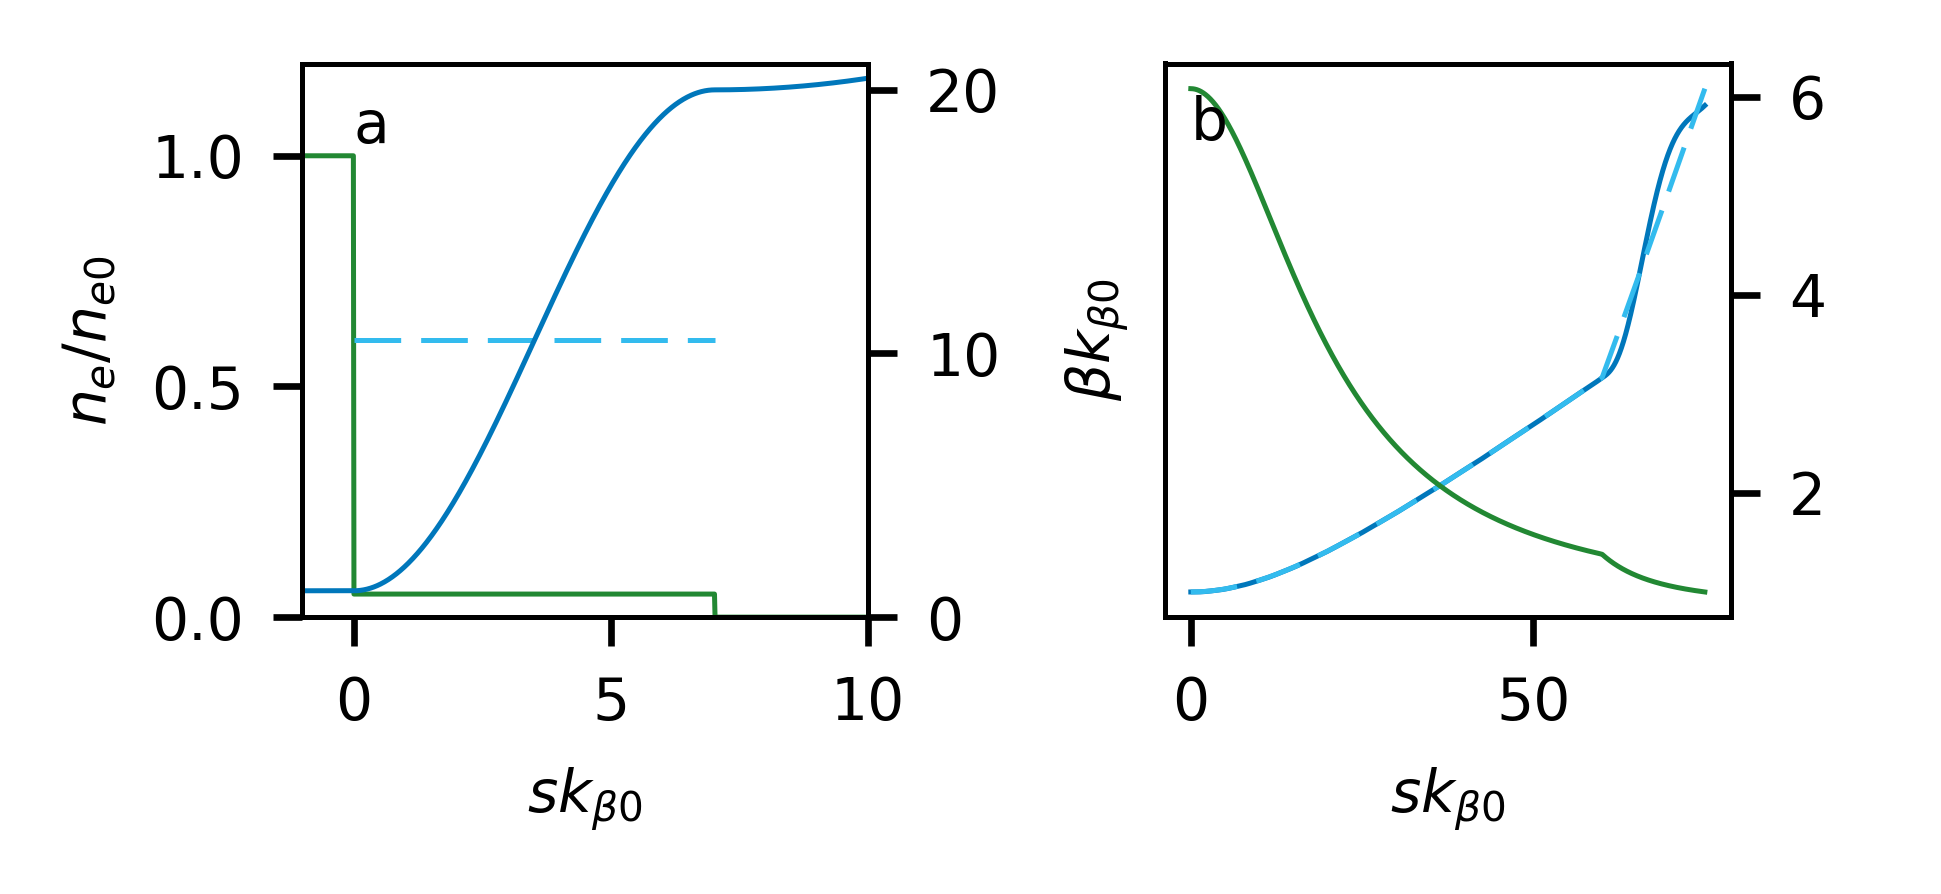

In [5]:
# Figure with kinked ramps and box ramp
# Lets plot some example square ramps
theta = lambda s: 2*np.sqrt(eta)*s
betaA = lambda s: np.real((B0/2-(a0**2+1)/eta/B0/2+1j*a0/np.sqrt(eta))*np.exp(1j*theta(s))
                          + (B0/2+(a0**2+1)/eta/B0/2))
betaD = lambda s: B0+s**2/B0

N = 1000
B0 = 20
a0 = 0
eta = 0.05
L = np.pi/(2*np.sqrt(eta))
s = np.linspace(-1, 10, N)
sel = [s > L, (s <= L) & (s > 0), s <= 0]
ne = np.piecewise(s, sel, [0, eta, 1.0])
beta = np.zeros(N)
beta[sel[0]] = betaD(s[sel[0]]-L)
beta[sel[1]] = betaA(s[sel[1]]+L)
beta[sel[2]] = 1.0
center = (B0/2+(a0**2+1)/eta/B0/2)

plt.figure(figsize=(3.37, 1.5), dpi=600)
plt.subplot(121)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$n_{e}/n_{e0}$')

plt.plot(s, ne, c=green)
plt.ylim(0, 1.2)
ax1 = plt.twinx()
plt.plot(s, beta)
plt.plot([0, L], [center, center], 'k--', c=cyan, zorder=1)
#ax1.yaxis.tick_left()
#ax1.set_axis_off()
plt.ylim(0.0, 21)
plt.xlim(-1, 10)
plt.text(0, 18, 'a')
#plt.legend([r'$\beta$', r'$\beta_m$'], bbox_to_anchor=(0.85, 0.5), loc='center', frameon=False)

#--------------------------------------------------
# Kink in the plasma density
N = 10000
Zmax = 75
beta0 = 1
alpha0 = 0
gamma0 = (1+alpha0**2)/beta0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
# Create the plasma density
z, dz = np.linspace(0, Zmax, N, retstep=True)

L = 60
a1 = 0.05
a2 = 0.2
sel = [z > L, (z <= L) & (z > 0), z <= 0]
frac = np.piecewise(z, sel, [1/(1+(a2*(z[sel[0]]-L*(1-a1/a2)))**2), 1/(1+(a1*z[sel[1]])**2), 1.0])
betam = 1/np.sqrt(frac)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)


ax0 = plt.subplot(122)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')

plt.plot(z, beta)
plt.plot(z, betam, 'k--', c=cyan, zorder=10)
ax1 = plt.twinx()
plt.plot(z, frac, c=green)
ax1.set_axis_off()
#plt.ylim(0.0, 21)
#plt.xlim(-1, 10)
ax0.yaxis.tick_right()
plt.text(0, 0.9, 'b')

plt.tight_layout()
plt.savefig(folder+'Box_Ramp.eps')
plt.show()

I0 0.00325570179691
I1 0.0180163344949
I2 0.191682317133


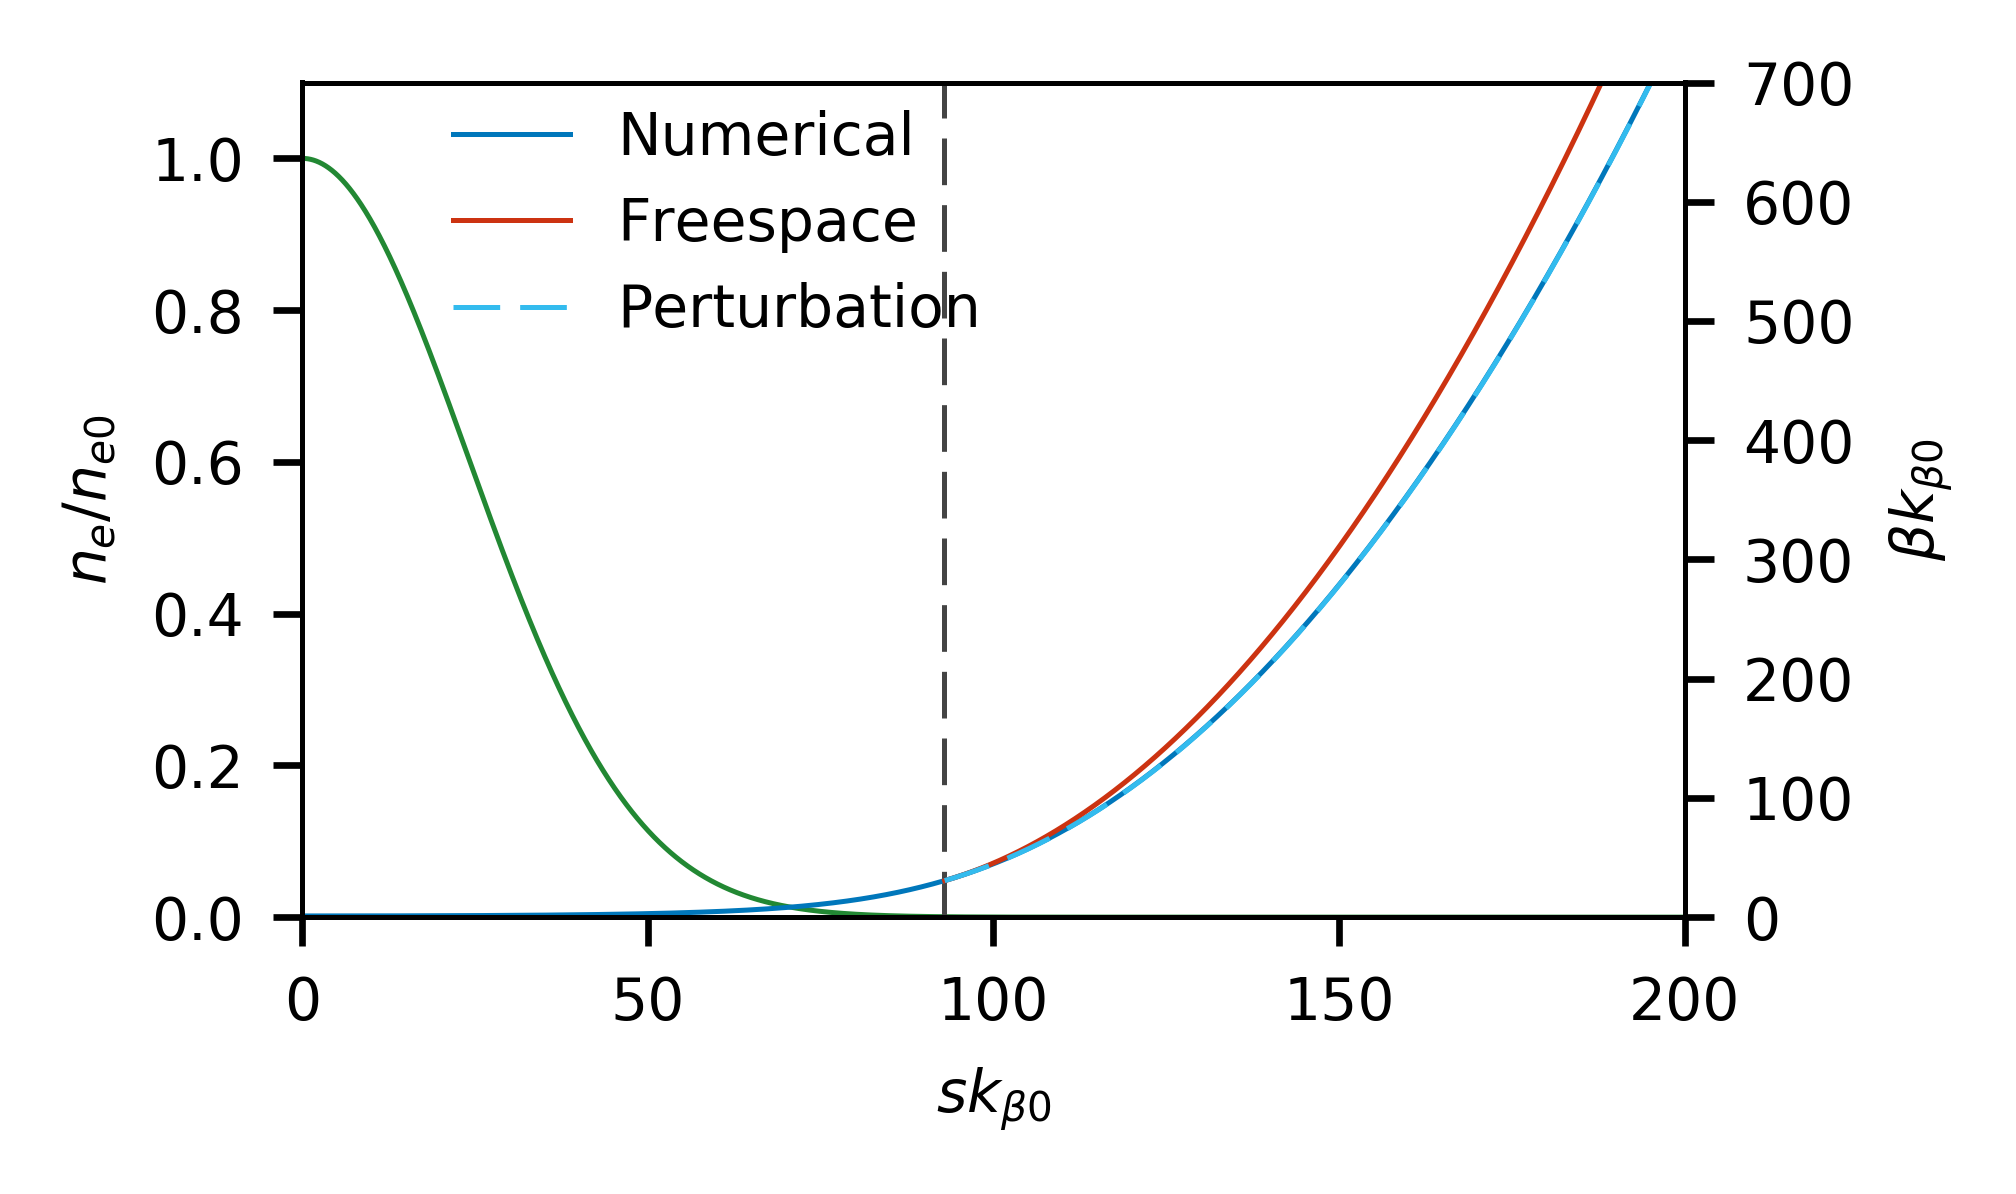

In [10]:
# Perturbative plasma ramp
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .85

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-np.array(alpha)<=cutoff][-1]
betaTran = np.array(beta)[-np.array(alpha)<=cutoff][-1]
alphaTran = np.array(alpha)[-np.array(alpha)<=cutoff][-1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
print('I0', I0[-1])
print('I1', I1[-1])
print('I2', I2[-1])
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran


beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(3.37, 2), dpi=600)
plt.plot(z, frac, c=green)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
#plt.yscale('log')
plt.ylim(0, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
plt.twinx()
plt.plot(z, beta)
plt.plot(zTran, beta2, )
plt.plot(zTran, betaPer, '--', c=cyan)
plt.plot([tran1, tran1], [-1, 1000], 'k--', c=grey, zorder=0)
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Numerical', 'Freespace', 'Perturbation'], bbox_to_anchor=(0.3, 0.83), loc='center', frameon=False)
plt.ylim(0, 700)
plt.xlim(0, 200)
#plt.text(105, 300, 'Start of perturbation')
#plt.arrow(33, 36.5, -30.5, -1, head_width=1)
plt.tight_layout()
plt.savefig(folder+'Perturbed_Evolution.eps')
plt.show()

9.979058765310151


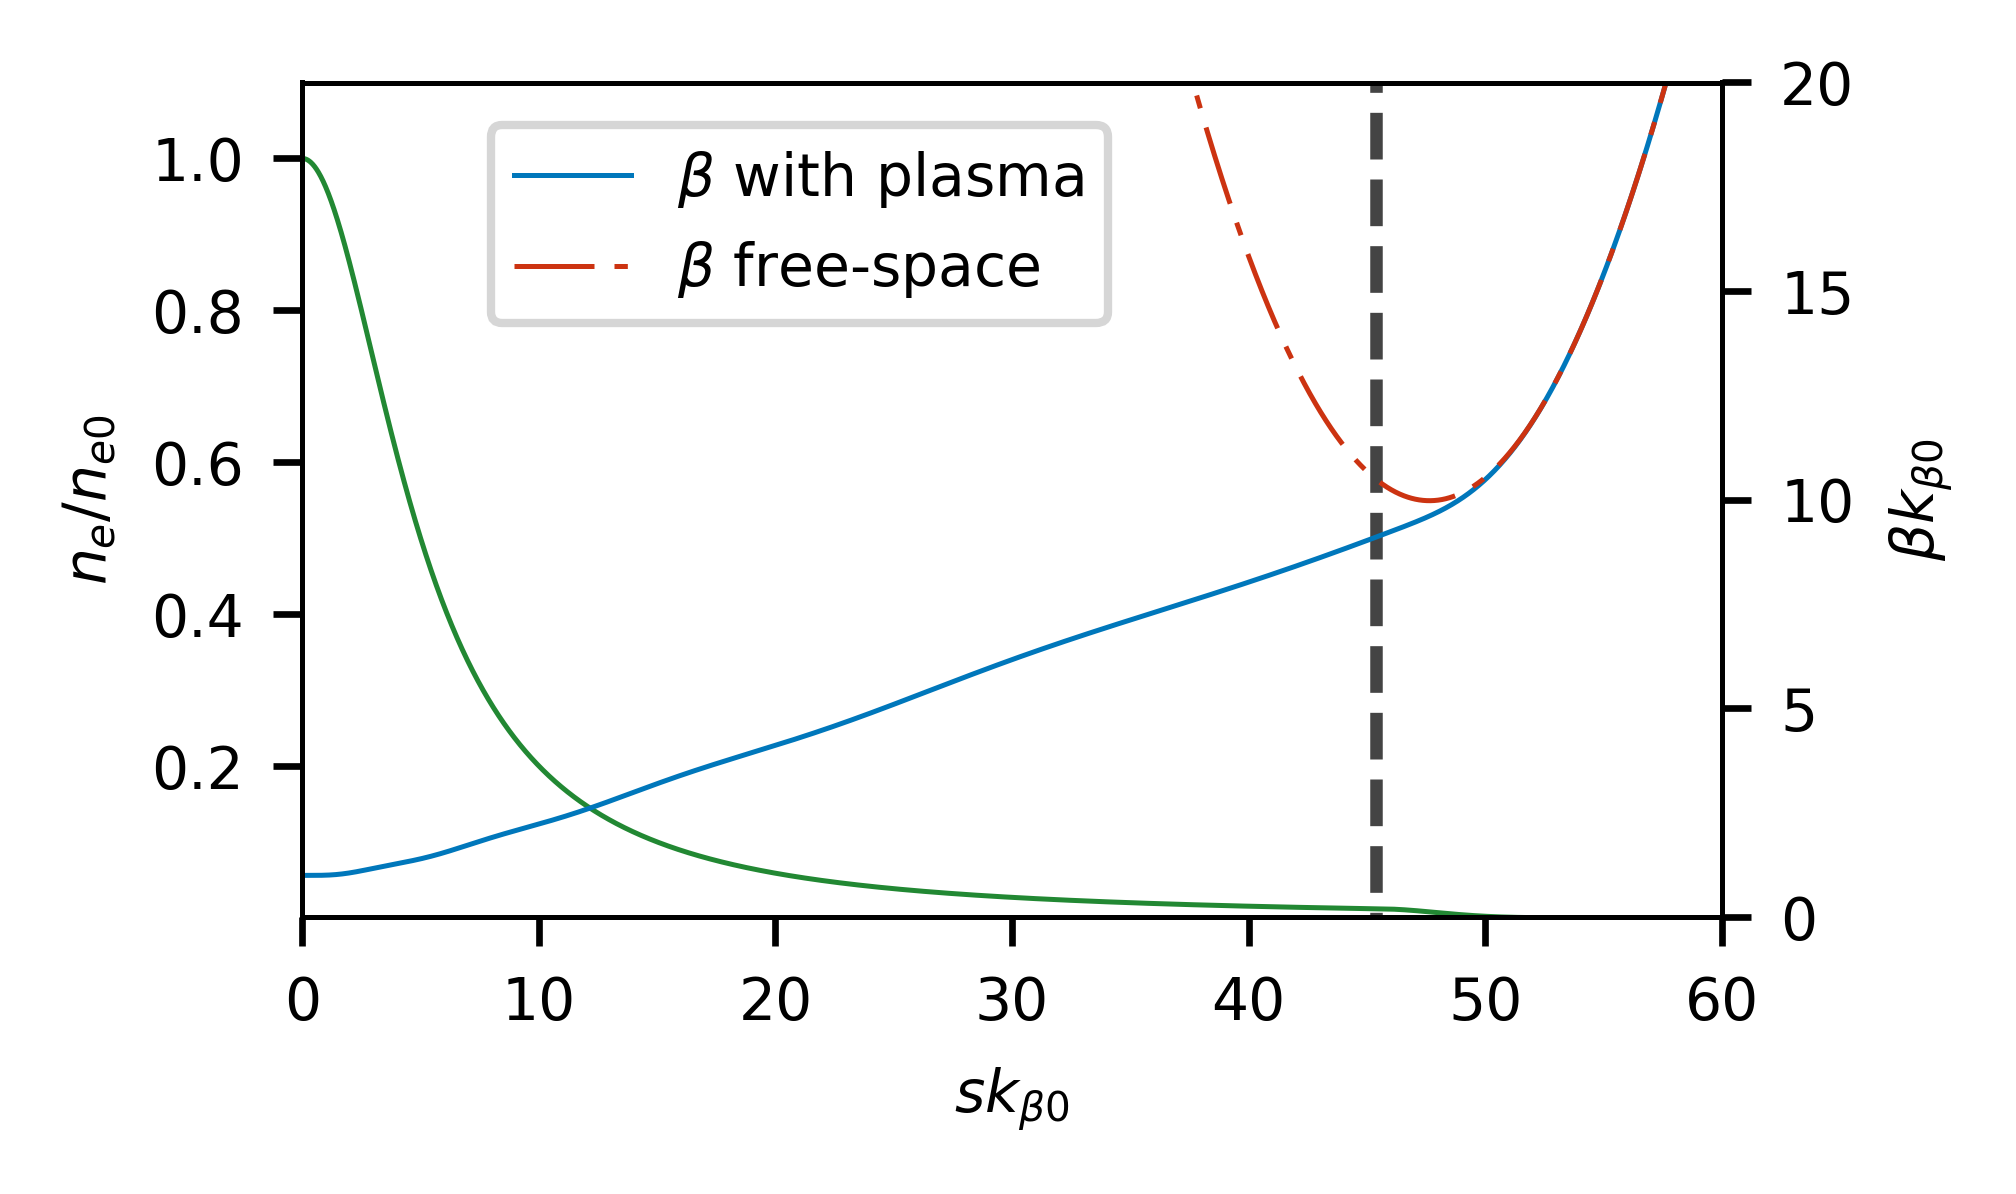

In [12]:
# Beam evolution and emittance growth in a pwfa
# Designer ramp
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
sel = frac < 0.012
tran = z[sel][0]
ztran = z[sel]
sigma = 2.5
frac[sel] = frac[sel][0]*np.exp(-(ztran - z[sel][0])**2/(2*sigma**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Calculate free space propagation
bs = 1/gamma[-1]
ss = alpha[-1]*bs + 100
betaFree = (z-ss)**2/bs+bs

# Calculate perturbed solution
zTran = z[sel]
fracTran = frac[sel]
neTran = np.zeros(len(zTran))
tran1 = z[sel][0]
betaTran = np.array(beta)[sel][1]
alphaTran = np.array(alpha)[sel][1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran

print(bs)

plt.figure(figsize=(3.37, 2), dpi=600)
plt.plot(z, frac, c=green)
plt.ylim(1e-3, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
#plt.yscale('log')
plt.twinx()
plt.plot(z, beta)
plt.plot(z, betaFree, '-.')
#plt.plot(zTran, betaPer, '--', c=purple)
#plt.plot(z, 1/np.sqrt(frac), c=cyan, zorder=1)

# Plot transition points
plt.plot([tran1, tran1], [-1, 1e4], 'k--', c=grey, zorder=1, linewidth=1.5)

plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'$\beta$ with plasma', r'$\beta$ free-space'], bbox_to_anchor=(0.35, 0.83), loc='center')
plt.ylim(0, 20)
plt.xlim(0, 60)
plt.tight_layout()
plt.savefig(folder+'Example_Ramp.svg')
plt.show()